PPGI/UFRJ  //  Análise de Risco  //  Prof. Eber  
Lista 06  //  Data: 17/07/2018  //  Entrega: 24/07/2018  
Luis Filipe Kopp

Uma empresa de projetos está fazendo um estudo de previsão dos negócios para o primeiro semestre do próximo ano. Quase todos os negócios, à exceção de dois contratos tem uma chance de serem fechados. Além disto, sua data de início e faturamento total são dados por uma estimativa.  

Após uma reunião com a equipe do departamento comercial, foram identificados 8 projetos cujas características estão mostradas nas tabelas 1 e 2. A partir destes dados, construa um modelo de risco do negócio da empresa de projetos,
que mostra o risco da contribuição líquida mensal para o para os primeiros meses do próximo ano.

|Contrato|Chance|Inicio min|inicio prov|inicio max|duracao min|duracao prov|duracao max|
|---|---|---|---|---|---|---|---|
|A|1|1|1|1|2|3|5|
|B|1|1|1|1|6|7|9|
|C|0.3|2|3|5|4|4|5|
|D|0.4|1.5|2|3|2|2.5|3.5|
|E|0.2|2|2|4|3|3|5|
|F|0.4|2|3|6|2|2|3|
|G|0.4|1|2|3.5|2|3|5|
|H|0.5|2.5|3|5|3|3.5|4.5|
Tabela 1 - Estimativa de início e duração dos contratos


|Contrato|faturamento min|faturamento prov|faturamento max|margem min|margem prov|margem max|
|---|---|---|---|---|---|---|
|A|400|425|525|0.14|0.18|0.21|
|B|375|480|550|0.17|0.22|0.26|
|C|525|600|780|0.14|0.18|0.21|
|D|625|700|800|0.14|0.18|0.21|
|E|250|300|370|0.17|0.22|0.26|
|F|425|475|550|0.14|0.18|0.21|
|G|480|500|550|0.17|0.22|0.26|
|H|550|600|700|0.17|0.22|0.26|
Tabela 2 - Estimativas faturamento e margem dos contratos

In [3]:
set.seed(1)
library(triangle)

Warning message:
"package 'triangle' was built under R version 3.3.3"

In [4]:
d <- function(){
    list(c(rbinom(1,1,1),rtriangle(1,1,1,1),rtriangle(1,2,5,3),
           rtriangle(1,400,525,425), rtriangle(1,.14,.21,.18)),
        c(rbinom(1,1,1),rtriangle(1,1,1,1),rtriangle(1,6,9,7),
          rtriangle(1,375,550,480), rtriangle(1,.17,.26,.22)),
        c(rbinom(1,1,.3),rtriangle(1,2,5,3),rtriangle(1,4,5,4),
          rtriangle(1,525,780,600), rtriangle(1,.14,.21,.18)),
        c(rbinom(1,1,.4),rtriangle(1,1.5,3,2),rtriangle(1,2,3.5,2.5),
          rtriangle(1,625,800,700), rtriangle(1,.14,.21,.18)),
        c(rbinom(1,1,.2),rtriangle(1,2,4,2),rtriangle(1,3,5,3),
          rtriangle(1,250,370,300), rtriangle(1,.17,.26,.22)),
        c(rbinom(1,1,.4),rtriangle(1,2,6,3),rtriangle(1,2,3,2),
          rtriangle(1,425,550,475), rtriangle(1,.14,.21,.18)),
        c(rbinom(1,1,.4),rtriangle(1,1,3.5,2),rtriangle(1,2,5,3),
          rtriangle(1,480,550,500), rtriangle(1,.17,.26,.22)),
        c(rbinom(1,1,.5),rtriangle(1,2.5,5,3),rtriangle(1,3,4.5,3.5),
          rtriangle(1,550,700,600), rtriangle(1,.17,.26,.22)))
    }
d()

[[1]]
[1]   1.0000000   1.0000000   3.0590578 451.9292606   0.1961161

[[2]]
[1]   1.0000000   1.0000000   8.2191915 523.9667912   0.2250554

[[3]]
[1]   0.0000000   2.4305332   4.1089190 583.1089313   0.1843631

[[4]]
[1]   0.0000000   2.4124305   2.6319844 729.7029438   0.2058772

[[5]]
[1]   0.0000000   3.0564858   4.4889432 285.6770953   0.2245885

[[6]]
[1]   0.0000000   3.0346413   2.2164913 434.1482010   0.1727213

[[7]]
[1]   1.0000000   1.9224275   3.2371843 512.5631250   0.2171268

[[8]]
[1]   0.0000000   4.0709503   3.7948051 644.4446034   0.1920397

In [5]:
distribui <- function(inicio,duracao,valor){
    fim <- inicio + duracao -1
    mensal <- valor / duracao
    parcela <- rep(0,12)
    for(mes in 1:12){
        if(floor(inicio) == mes){
            parcela[[mes]] <- round((mes-inicio+1)*mensal,2)
        }
        
        if(floor(fim) + 1 == mes){
            parcela[[mes]] <- round((fim-mes+1)*mensal,2)
        }
        
        if((floor(inicio) + 1 <= mes) & (floor(fim) >= mes)){
            parcela[[mes]] <- round(mensal,2)
        }  
    }
    parcela
}
distribui(2,2,4)

[1] 0 2 2 0 0 0 0 0 0 0 0 0

In [6]:
simula <- function(){
    dados <- d()
    fatura <- rep(0,12)
    n <- length(dados)
    resultado <- c()
    for(i in 1:n){

        fatura <- fatura +(distribui(dados[[i]][2], dados[[i]][3], 
                                     dados[[i]][1] * dados[[i]][4] * 
                                     dados[[i]][5]))
    }
    fatura
}
simula()

[1]  42.94  81.77 119.12  81.89  56.93  44.04  14.96   5.42   0.00   0.00
[11]   0.00   0.00

In [7]:
n <- c()
for(j in 1:3000){
    n <- rbind(n,c(simula()))
}

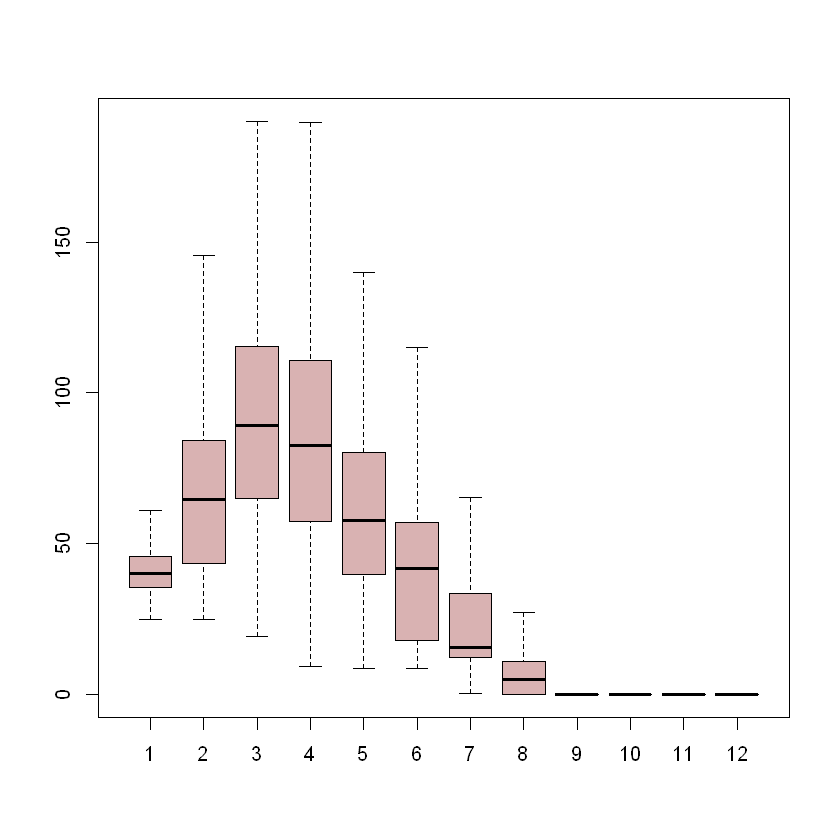

In [12]:
boxplot(n, outline = F, col=rgb(.5,0,0,.3))

[1]  1.00000 41.64291 76.82464
[1]   2.00000  66.68516 672.57061
[1]    3.00000   91.36161 1334.49884
[1]    4.00000   85.22721 1387.26256
[1]   5.00000  60.48399 884.54260
[1]   6.00000  42.44126 551.40933
[1]   7.00000  23.29301 230.64731
[1]  8.000000  6.490737 50.062296
[1] 9.0000000 0.6676167 3.5622482
[1] 10  0  0
[1] 11  0  0
[1] 12  0  0


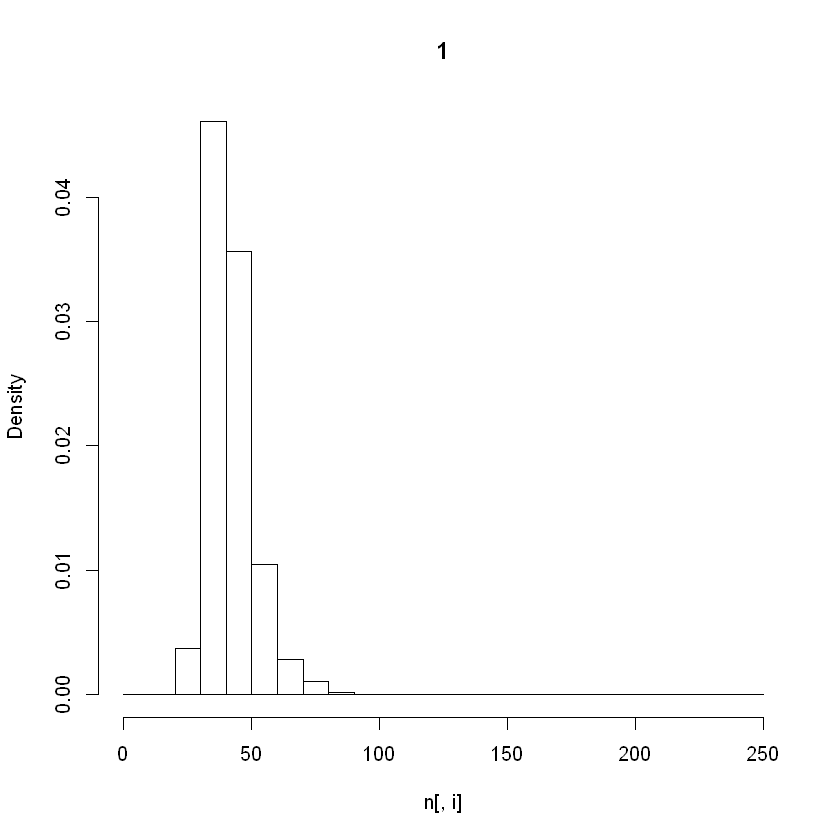

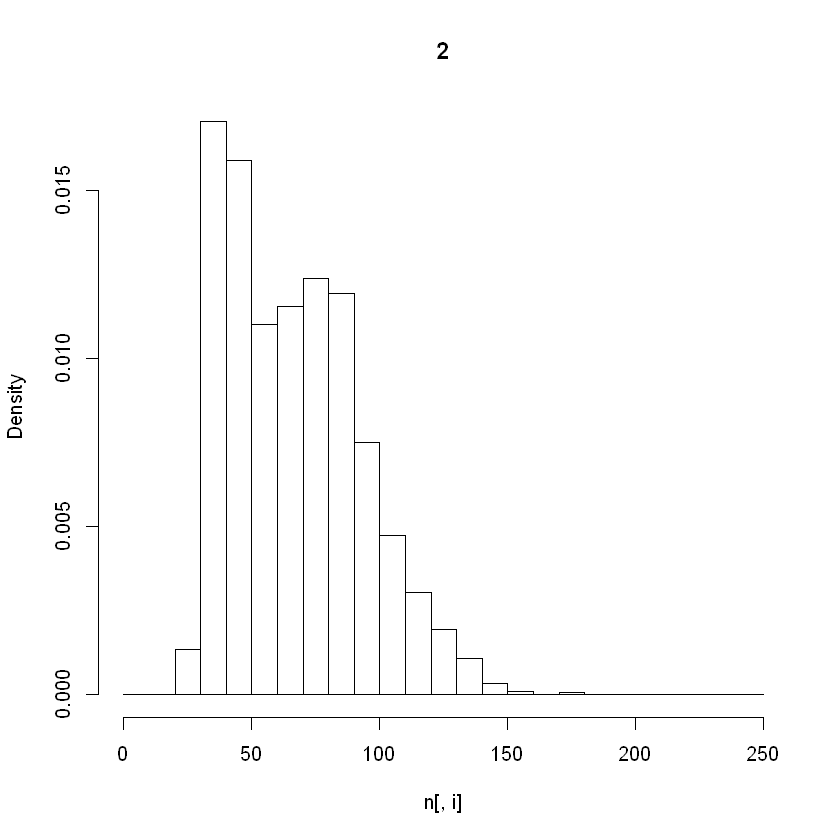

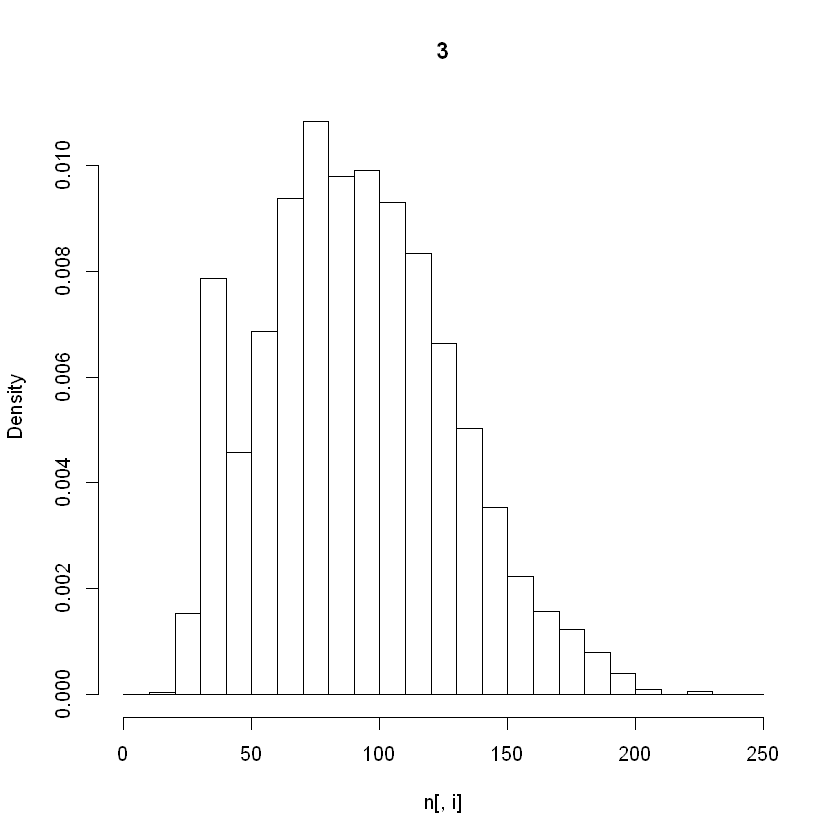

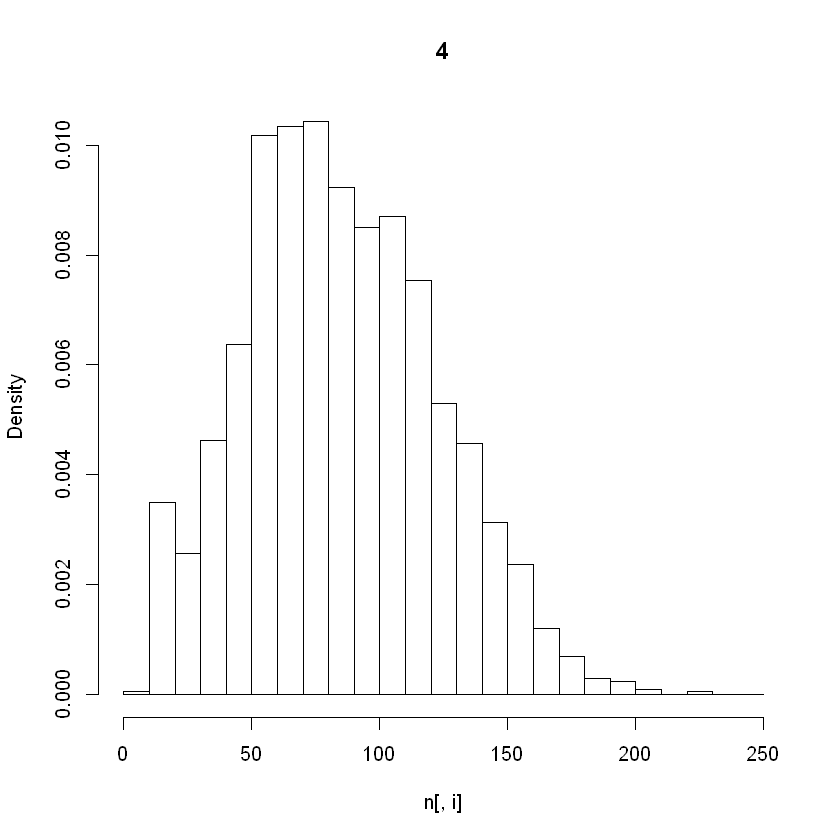

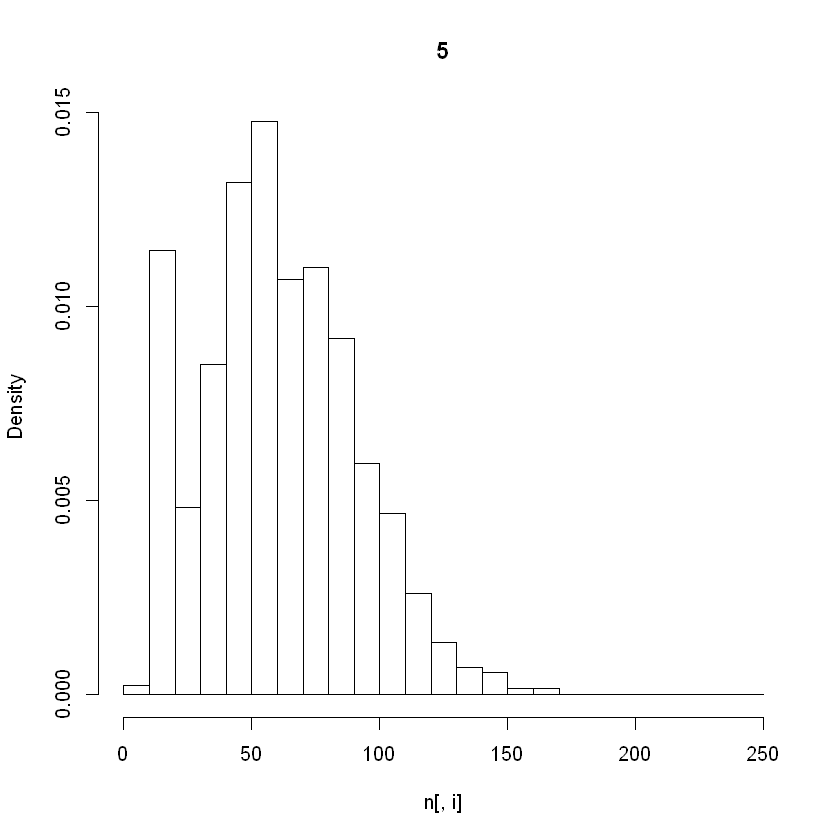

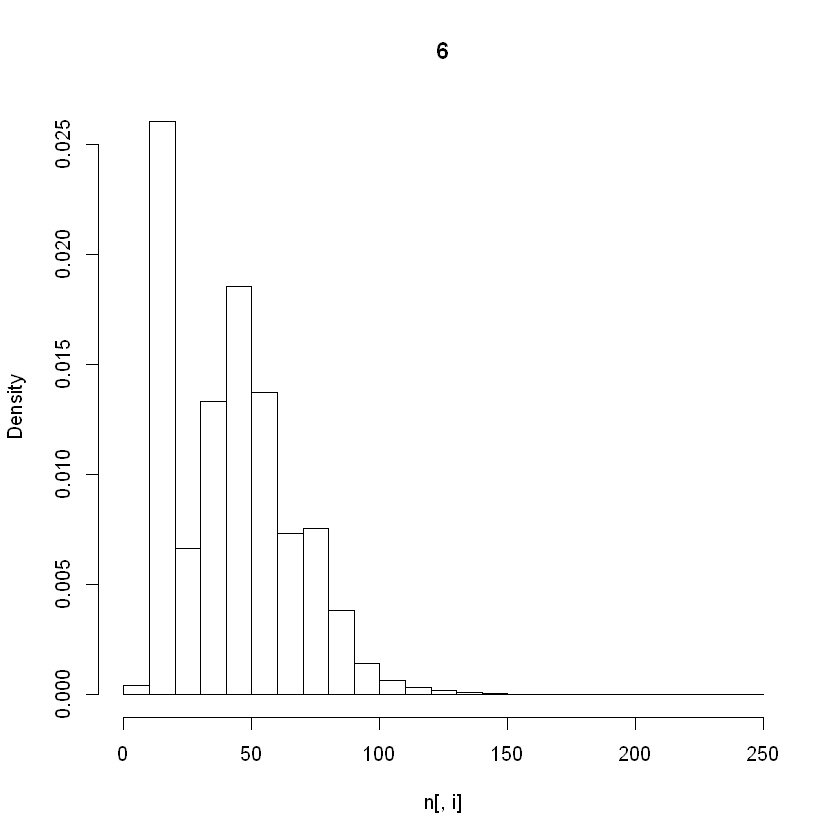

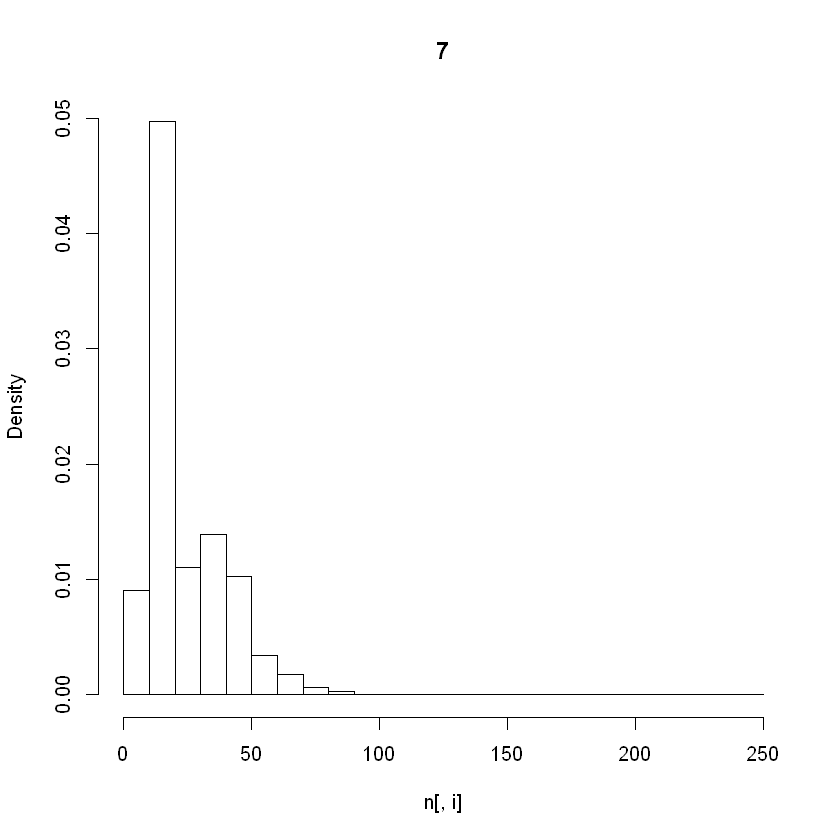

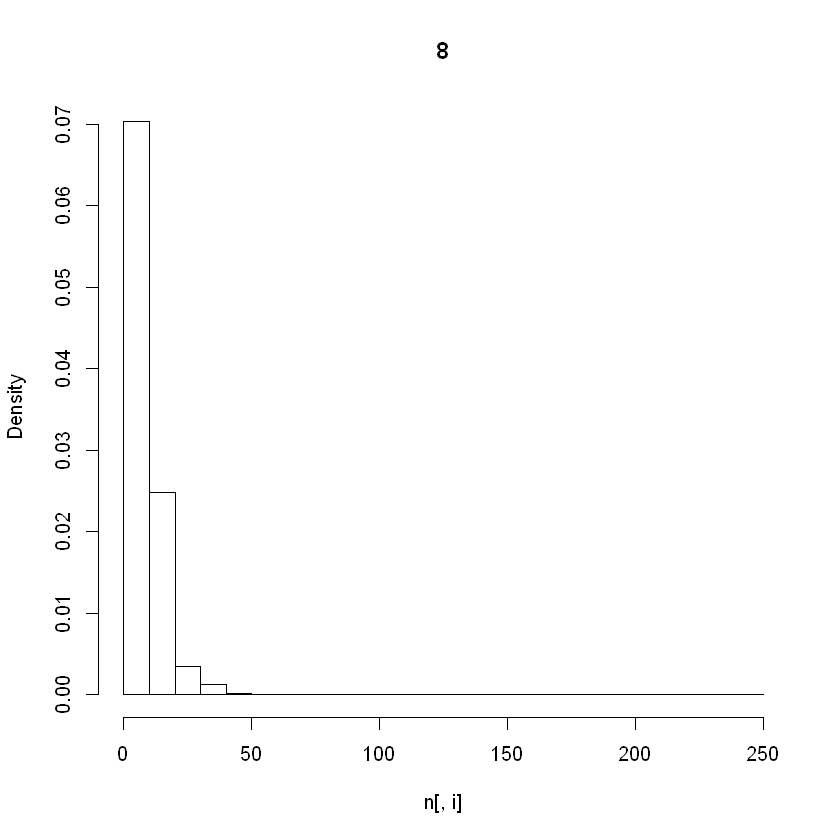

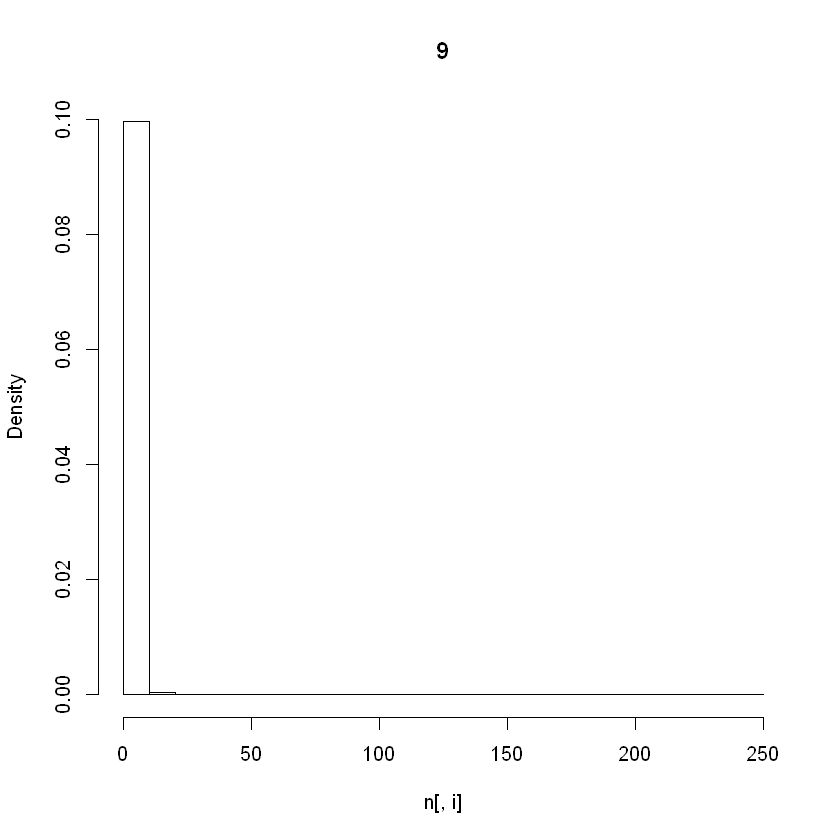

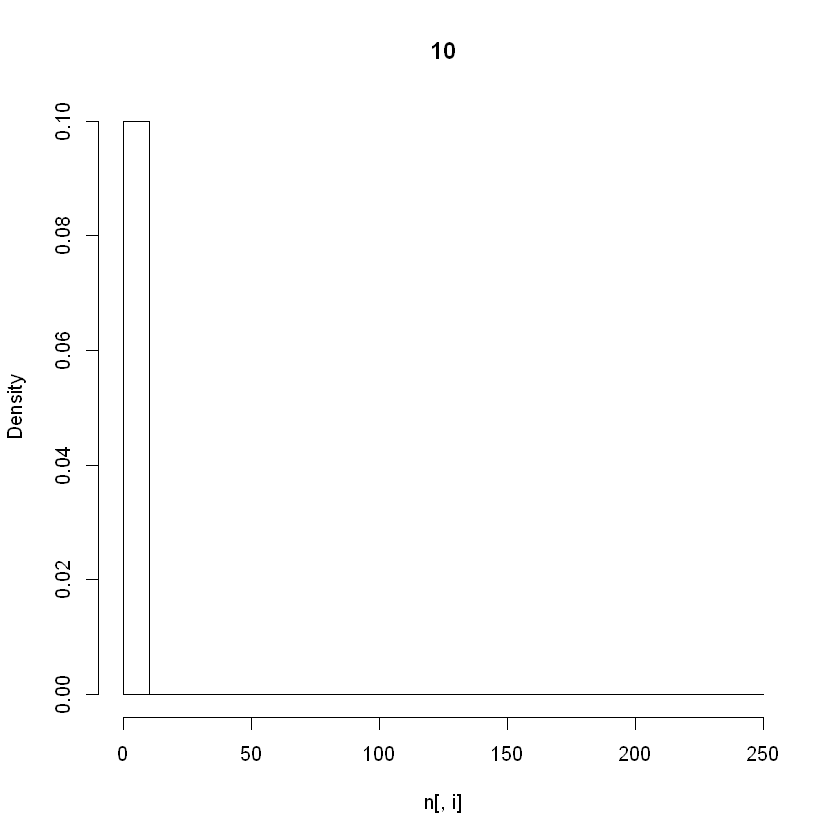

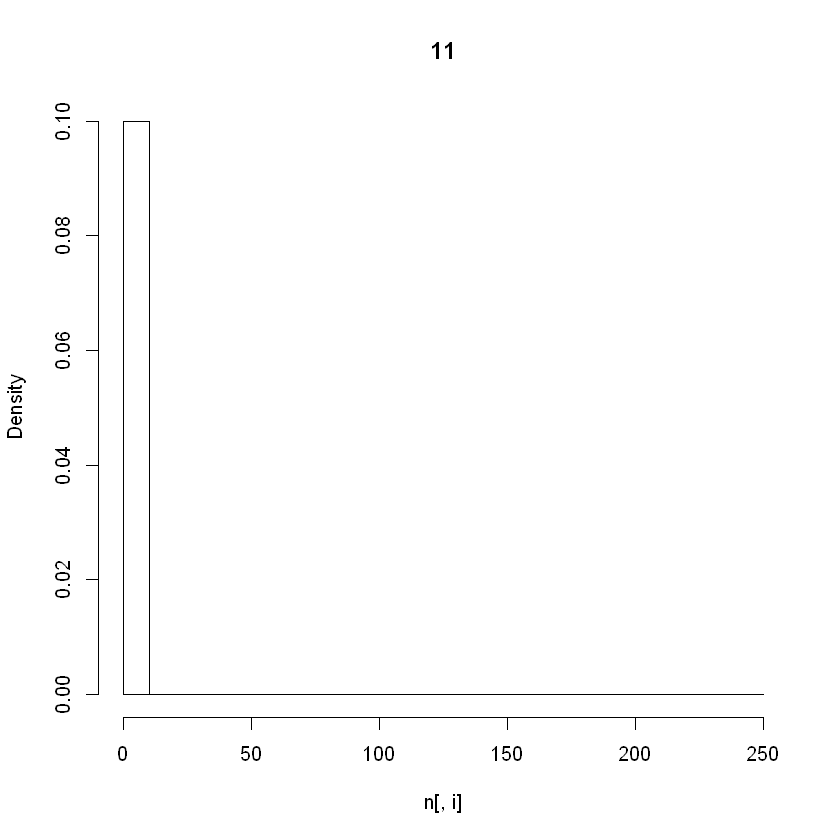

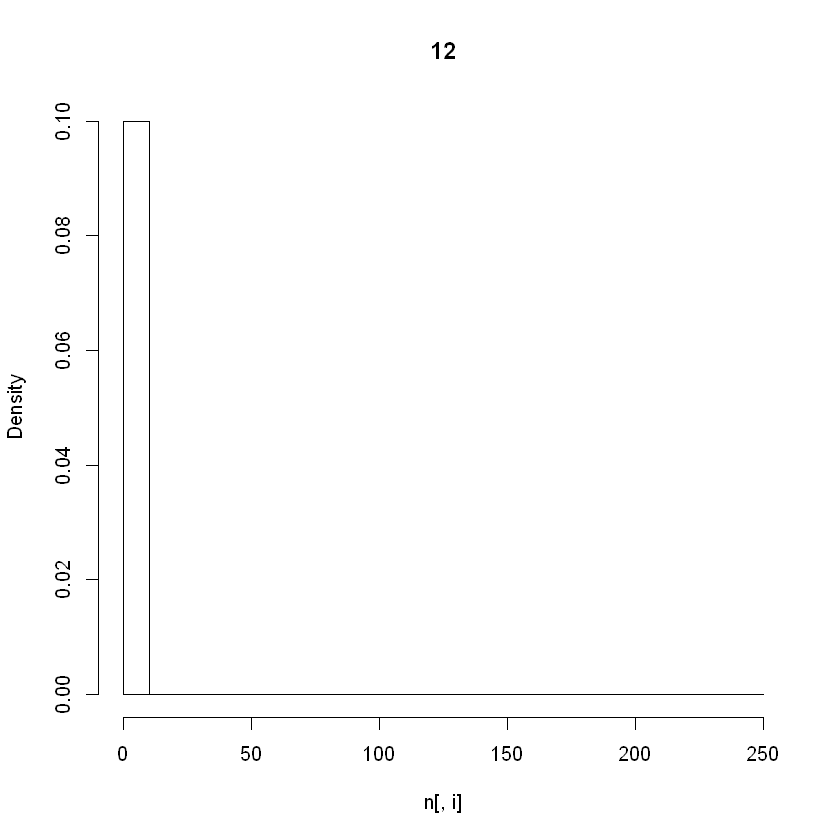

In [16]:
for( i in 1:12){
    print(c(i, mean(n[,i]), sd(n[,i])^2))
}
for( i in 1:12){
   hist(n[,i], main=i,xlim=c(0,250), freq=F,breaks=seq(0,250,10)) 
}


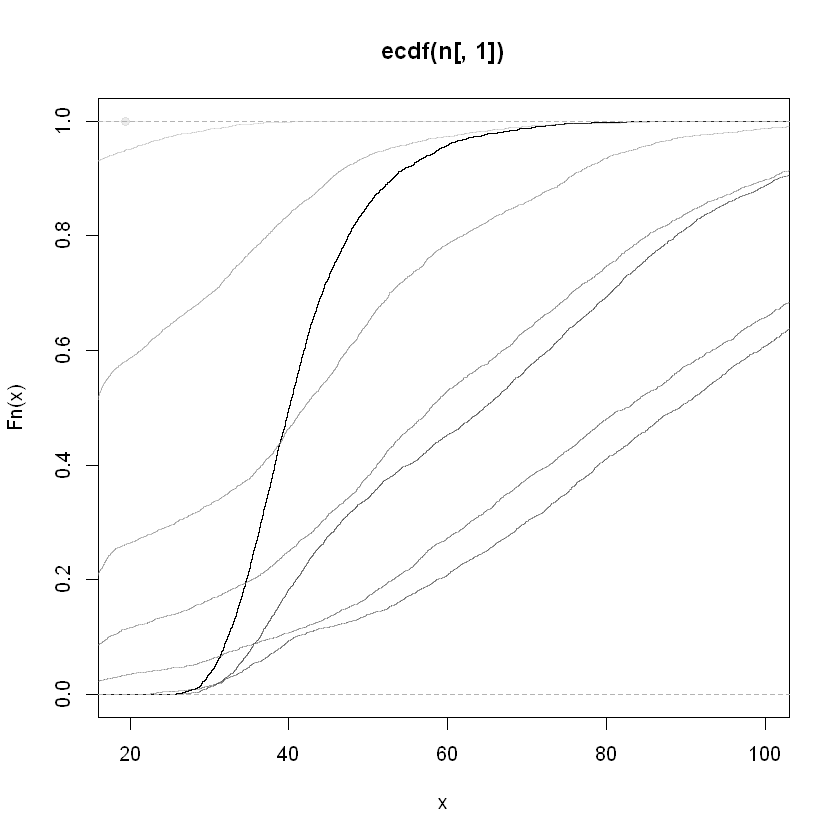

In [18]:
plot(ecdf(n[,1]), col="black")
for(i in 2:12){
    lines(ecdf(n[,i]), col=rgb(i/12,i/12,i/12,.3))
}

